<h1>Neural Networks with One Hidden Layer</h1>


<h2>Objective</h2><ul><li> How to classify handwritten digits using Neural Network.</li></ul> 


<h2>Table of Contents</h2>
<p>In this lab, you will use a single layer neural network to classify handwritten digits from the MNIST database.</p>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define the Neural Network, Optimizer, and Train the  Model</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>

<h2>Preparation</h2>


We'll need the following libraries


In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

Use the following helper functions for plotting the loss: 


In [2]:
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()

Use the following function for printing the model parameters: 


In [3]:
def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())

Define the neural network module or class: 


In [4]:
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

<a name="Model"><h2 id="Model">Neural Network Module and Training Function</h2></a>


Define the neural network module or class: 


In [5]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss and accuracy on the validation data. 


In [6]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
    
        correct = 0
        
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<a name="Makeup_Data"><h2 id="Makeup_Data">Make Some Data</h2></a> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [7]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 338kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.93MB/s]


Load the testing dataset and convert it to a tensor by placing a transform object in the argument <code>transform</code>:


In [8]:
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

Create the criterion function:  


In [9]:
criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<a name ="Train"><h2 id="Train">Define the Neural Network, Optimizer, and Train the Model</h2></a> 


Create the model with 100 neurons: 


In [11]:
input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

Print the model parameters: 


In [12]:
print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


Define the optimizer object with a learning rate of 0.01: 


In [13]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Train the model by using 30 epochs: 


In [14]:
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

<a name="Result"><h2 id="Result">Analyze Results</h2></a> 


Plot the training total loss or cost for every iteration and plot the training accuracy for every epoch:  


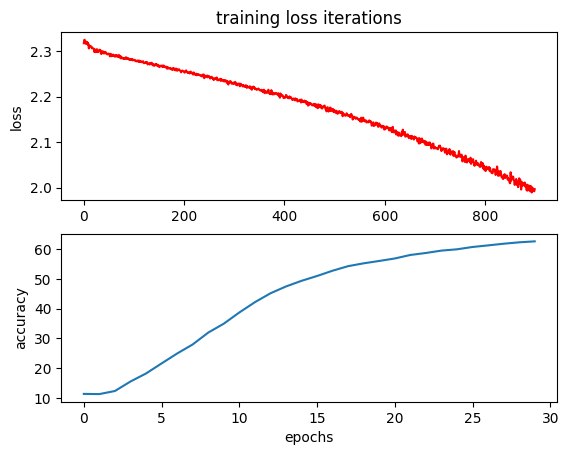

In [15]:
plot_accuracy_loss(training_results)

Plot the first five misclassified samples:   


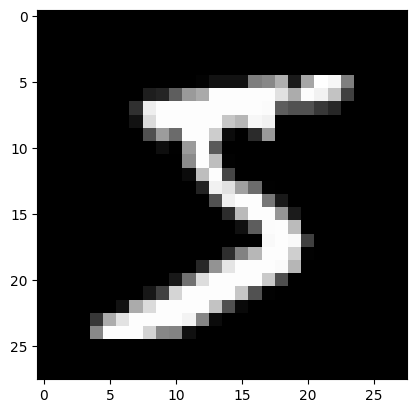

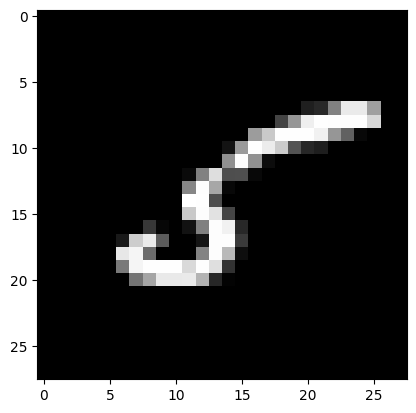

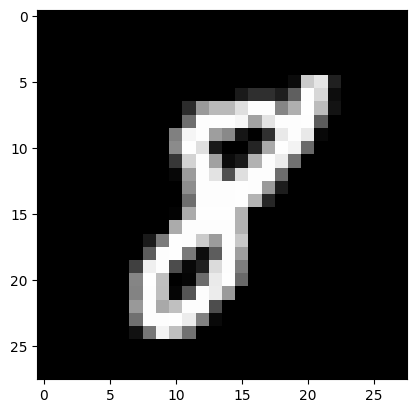

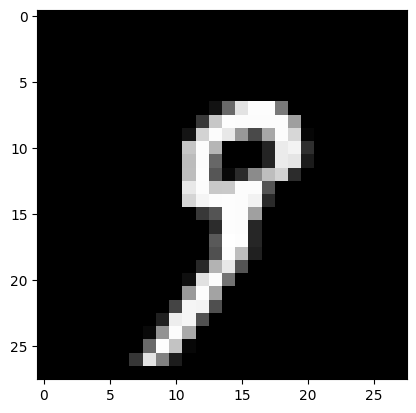

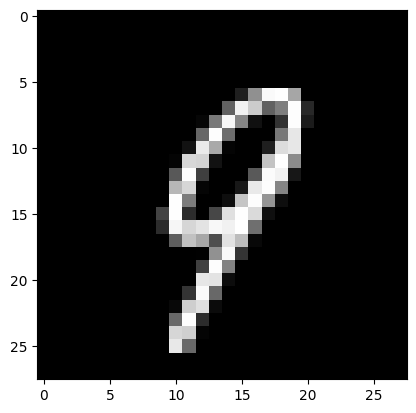

In [17]:
count = 0

for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,yhat = torch.max(z, 1)

    if yhat != y:
        show_data(x)
        count += 1

    if count >= 5:
        break